<a href="https://colab.research.google.com/github/maddym132/prophet_anomaly_detection/blob/master/FBprophet_Anomaly-detection_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from prophet import Prophet

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import datetime as dt
import plotly.express as px
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


The dataset 

In [19]:
df = pd.read_csv("/content/generated_signal.csv")
df

,acc_data,anomaly_size,time,acc_with_anomaly,anomaly_location,training_data
0,4.645567,0.0,30:00.0,4.645567,0,-0.267737
1,7.532210,0.0,30:00.0,7.532210,0,-0.625119
2,8.371957,0.0,30:00.0,8.371957,0,-0.835452
3,8.427020,0.0,30:00.0,8.427020,0,-0.803683
4,8.092888,0.0,30:00.0,8.092888,0,-0.498671
...,...,...,...,...,...,...
4995,3.599028,0.0,30:05.0,3.599028,0,2.669896
4996,3.664875,0.0,30:05.0,3.664875,0,3.122654
4997,3.428782,0.0,30:05.0,3.428782,0,3.611879
4998,3.992132,0.0,30:05.0,3.992132,0,4.087251


In [20]:
df['time'] =  pd.to_datetime(df['time'], format='%M:%S.%f')

In [21]:
df

,acc_data,anomaly_size,time,acc_with_anomaly,anomaly_location,training_data
0,4.645567,0.0,1900-01-01 00:30:00,4.645567,0,-0.267737
1,7.532210,0.0,1900-01-01 00:30:00,7.532210,0,-0.625119
2,8.371957,0.0,1900-01-01 00:30:00,8.371957,0,-0.835452
3,8.427020,0.0,1900-01-01 00:30:00,8.427020,0,-0.803683
4,8.092888,0.0,1900-01-01 00:30:00,8.092888,0,-0.498671
...,...,...,...,...,...,...
4995,3.599028,0.0,1900-01-01 00:30:05,3.599028,0,2.669896
4996,3.664875,0.0,1900-01-01 00:30:05,3.664875,0,3.122654
4997,3.428782,0.0,1900-01-01 00:30:05,3.428782,0,3.611879
4998,3.992132,0.0,1900-01-01 00:30:05,3.992132,0,4.087251


In [22]:
df.dtypes

acc_data                   float64
anomaly_size               float64
time                datetime64[ns]
acc_with_anomaly           float64
anomaly_location             int64
training_data              float64
dtype: object

Now we are going to plot the data, and I am drawing the line chart. On the x-axis, we have a timestamp, and on Y-axis, we have values.

In [24]:
#express to plot entire data
fig = px.line(df.reset_index(), x='time', y='acc_with_anomaly', title='Anomaly Data')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward")
        ])
    )
)
fig.show()

## modeling
 using Facebook Prophet to detect anomalies in time-series data

In [25]:
from prophet import Prophet
anomaly_df = df.reset_index()[['time', 'acc_with_anomaly']].rename({'time':'ds', 'acc_with_anomaly':'y'}, axis='columns')

Separate the train and test set

In [26]:
#train test split
train = anomaly_df[:4000]
test = anomaly_df[4000:]

In [27]:
print(train.shape)
print(test.shape)

(4000, 2)
(1000, 2)


Create Prophet model

When we use Facebook prophet, it gives the output according to the confidence interval. By default, it is set to 80 per cent, and we change it to a 95 per cent confidence interval so it will give us prediction and lower and upper confidence intervals. After that, we feed the train data to it. After running the below snippet, it shows you that yearly seasonality is not valid because data is of only six months.

In [28]:
m = Prophet()
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqbtoeqhj/h7aai_w0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqbtoeqhj/9hffpyzc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83483', 'data', 'file=/tmp/tmpqbtoeqhj/h7aai_w0.json', 'init=/tmp/tmpqbtoeqhj/9hffpyzc.json', 'output', 'file=/tmp/tmpkwtkx735/prophet_model-20220811052811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:28:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:28:11 - cmdstanpy - INFO - Chain [1] done processing
IN

Forecast on test data

We are creating a dataframe that only consists of dates of test data in timestamp format to forecast test data. We need to create a dataframe with hourly frequency because by default it creates on daily basis.

In [29]:
future = m.make_future_dataframe()

In [31]:
forecast = m.predict(df=test)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
995,1900-01-01 00:30:05,0.369037,-2.506265,3.198380
996,1900-01-01 00:30:05,0.369037,-2.511960,3.320623
997,1900-01-01 00:30:05,0.369037,-2.850591,3.481168
998,1900-01-01 00:30:05,0.369037,-2.852905,3.368420
999,1900-01-01 00:30:05,0.369037,-2.503091,3.205291


Now we want to see the difference between actual and predicted values so I am creating a new dataframe where we merge the actual and forecasted dataframe. At the same time, we also visualize the forecast values to understand the predictions.

In [57]:
anomaly_df_new = test.copy().reset_index(drop=True)
anomaly_df_new['yhat'] = forecast['yhat']
anomaly_df_new['yhat_lower'] = forecast['yhat_lower']
anomaly_df_new['yhat_upper'] = forecast['yhat_upper']
#fig1 = m.plot(forecast)#

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1900-01-01 00:30:04,0.491674,-2.248385,3.136020,0.491674,0.491674,0.0,0.0,0.0,0.0,0.0,0.0,0.491674
1,1900-01-01 00:30:04,0.491674,-2.101646,3.233996,0.491674,0.491674,0.0,0.0,0.0,0.0,0.0,0.0,0.491674
2,1900-01-01 00:30:04,0.491674,-2.396395,3.182677,0.491674,0.491674,0.0,0.0,0.0,0.0,0.0,0.0,0.491674
3,1900-01-01 00:30:04,0.491674,-2.331148,3.337570,0.491674,0.491674,0.0,0.0,0.0,0.0,0.0,0.0,0.491674
4,1900-01-01 00:30:04,0.491674,-2.338739,3.178131,0.491674,0.491674,0.0,0.0,0.0,0.0,0.0,0.0,0.491674
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1900-01-01 00:30:05,0.369037,-2.506265,3.198380,-0.392780,1.094998,0.0,0.0,0.0,0.0,0.0,0.0,0.369037
996,1900-01-01 00:30:05,0.369037,-2.511960,3.320623,-0.392780,1.094998,0.0,0.0,0.0,0.0,0.0,0.0,0.369037
997,1900-01-01 00:30:05,0.369037,-2.850591,3.481168,-0.392780,1.094998,0.0,0.0,0.0,0.0,0.0,0.0,0.369037
998,1900-01-01 00:30:05,0.369037,-2.852905,3.368420,-0.392780,1.094998,0.0,0.0,0.0,0.0,0.0,0.0,0.369037


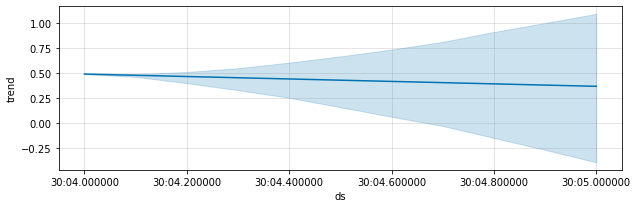

In [35]:
comp = m.plot_components(forecast)

In [39]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [49]:
anomaly_df_new['error'] = anomaly_df_new['y'] - anomaly_df_new['yhat']
anomaly_df_new['uncertainty'] = anomaly_df_new['yhat_upper'] - anomaly_df_new['yhat_lower']

In [55]:
anomaly_df_new['anomaly'] = anomaly_df_new.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)


Visualizing the Anomalies in Data

Now we are creating a scatter plot in which the x-axis is a timestamp, the y-axis values, and color of points vary as per anomaly. the color is the anomaly part of it so let us see that how anomalies look in a graph.

In [56]:
#visualize the anomaly data
fig = px.scatter(anomaly_df_new.reset_index(), x='ds', y='y', color='anomaly', title='Anomaly data')
#slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='3y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()